In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Connect Drive to save and restore results

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/Results_WGAN_GP
MAIN_SAVE_DIR = '/content/drive/My Drive/Results_WGAN_GP'

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/Results_WGAN_GP’: File exists


# Environment prep for Colab


*  download git repo

*   install required pip packages



In [4]:
!git clone https://github.com/kkahloots/PokemonGAN.git
IMG_DIR = '/content/PokemonGAN/data/.pokemon_LMDB'
%cd /content/PokemonGAN/
#!pip -q install -r /content/Generative_Models/requirements.txt # we do not working here!!
!pip install colorlog==4.0.2
%cd /content/

Cloning into 'PokemonGAN'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 121 (delta 41), reused 115 (delta 35), pack-reused 0
Receiving objects: 100% (121/121), 9.74 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/PokemonGAN
/content


In [5]:
!pip install livelossplot

# Settings

In [6]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep

import sys
sys.path.append('..'+sep_local+'..')
print(sep_local)

env: TF_KERAS=1
/


In [7]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [8]:
os.getcwd()

'/content'

In [9]:
os.chdir('..'+sep_local)
print(os.getcwd())
%cd /content/PokemonGAN/

/
/content/PokemonGAN


# only on colab

In [10]:
#don't need here, data set already correct lmdb

In [11]:
#!cat data/.pokemon/pokemon.tar.part* > data/.pokemon/pokemon.tar

In [12]:
#!tar -xvf data/.pokemon/pokemon_combined.tar --directory data/.pokemon/

# Dataset loading

In [13]:
from generators.from_lmdb.lmdb_image_generator import get_generators

In [14]:
dataset_name='pokemon'
inputs_shape= image_shape=(100, 100, 3)
batch_size = 36
latents_dim = 150
intermediate_dim = 50
lmdb_dir = 'data/.pokemon_LMDB'

In [15]:
from transformation.lmdb_transformer import LmdbTransformer

In [16]:
train_generator, val_generator = get_generators(
        lmdb_dir=lmdb_dir,
        batch_size=batch_size,
        episode_len=None,
        episode_shift=None,
        return_itr=False
)

Initializing Iterator training Number of images 591
Initializing Iterator validation Number of images 218


/content/PokemonGAN/transformation/file_image_generator.py:51: UserWarning: No files found
  warnings.warn(msg)


In [17]:
import numpy as np
_instance_scale=1.0
for data in val_generator:
    print(np.max(data['images']))
    break
    #print(data.keys())

1.0


In [18]:
[*data['images'][0].shape]


[100, 100, 3]

In [19]:
data.keys()

dict_keys(['images', 'label'])

In [20]:
restore_path = MAIN_SAVE_DIR

# Model's Layers definition

In [21]:
from building.models import WGAN_GP

/content/PokemonGAN/utils/utils.py:33: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [22]:
gan_model = WGAN_GP(
                    model_name=dataset_name+'_WGAN_GP', 
                    save_path=restore_path, 
                    image_size=inputs_shape, 
                    z_dim=latents_dim, 
                    n_critic=5, 
                    batch_size=batch_size,
                    g_penalty=10
                   )

restore generator successfully ... 
restore discriminator successfully ... 
Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1, 150)]       0         
_________________________________________________________________
up_conv2d (UpConv2D)         (None, 5, 5, 1200)        4500000   
_________________________________________________________________
batch_norm (BatchNorm)       (None, 5, 5, 1200)        4800      
_________________________________________________________________
re_lu (ReLU)                 (None, 5, 5, 1200)        0         
_________________________________________________________________
up_conv2d_1 (UpConv2D)       (None, 25, 25, 1200)      23040000  
_________________________________________________________________
batch_norm_1 (BatchNorm)     (None, 25, 25, 1200)      4800      
_______________________________________________

# Model training

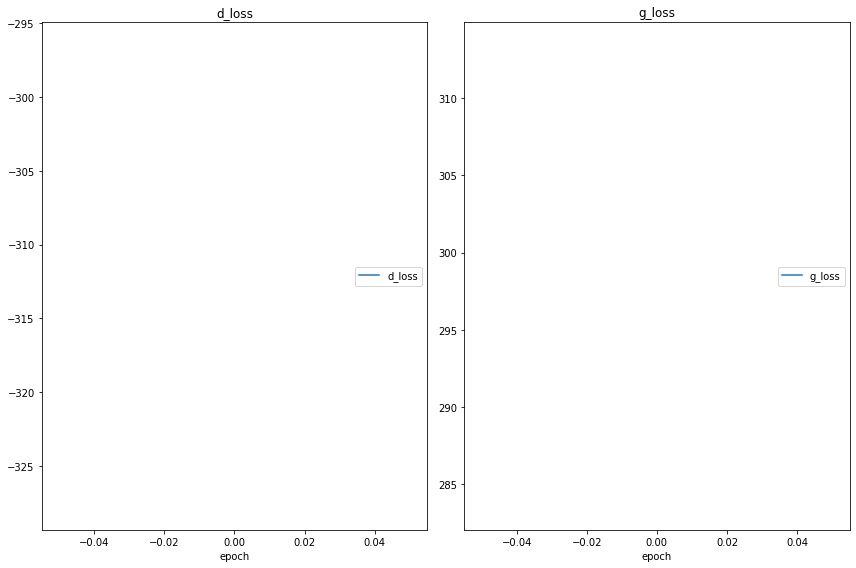

d_loss
	d_loss           	 (min: -312.131, max: -312.131, cur: -312.131)
g_loss
	g_loss           	 (min:  298.485, max:  298.485, cur:  298.485)
Epoch 2/20000


In [ ]:
gan_model.train(dataset=train_generator, start_epoch=0, epochs=int(2e4), n_itr=100)